In [38]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

In [4]:
song_lyrics.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,..."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t..."


In [5]:
bag_of_words.head()

,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


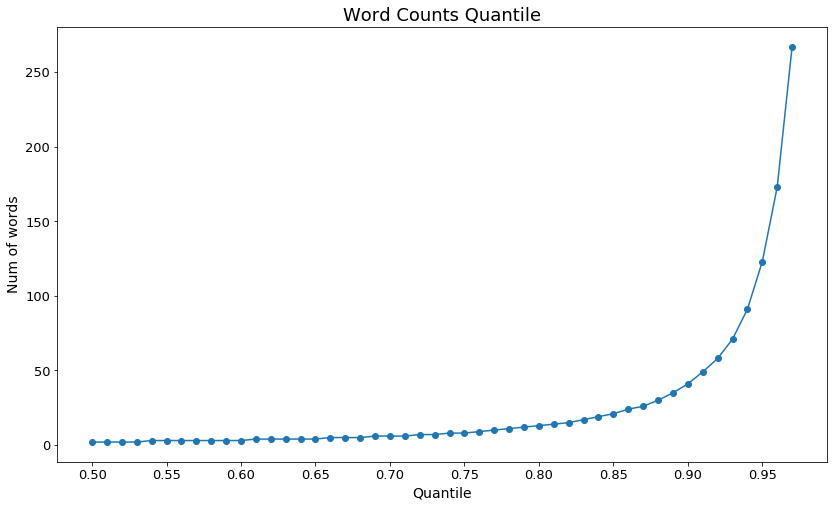

In [6]:
plt.figure(figsize=(13.8, 8))
# for i in ["GvAZL", "GvLAZ", "AZLvLAZ"]:
#     plt.plot(list(range(df.shape[0])), sorted(df[i]), label="{} ratio score".format(i))
plt.plot([i / 100 for i in range(50, 98, 1)], [np.quantile(bag_of_words["wordcount"], i/100) for i in range(50, 98, 1)], 
         "-o")
plt.xlabel("Quantile", fontsize=14)
plt.ylabel("Num of words", fontsize=14)
plt.title("Word Counts Quantile", fontsize=18)
plt.tick_params(labelsize=13)
plt.xticks([i / 100 for i in range(50, 98, 5)])
plt.show()

In [7]:
selected_bag_of_words = bag_of_words[(bag_of_words["wordcount"] != 1) & (bag_of_words["wordcount"] < np.quantile(bag_of_words["wordcount"], 0.94))]

In [39]:
# song_lyrics["word_intersect_counter"] = [defaultdict(int) for i in range(song_lyrics.shape[0])]
# try:
#     for i in range(song_lyrics.shape[0]):
#         curr = song_lyrics.loc[i]
#         if len(curr["word_intersect"]) != 0:
#             for w in curr["word_intersect"]:
#                 curr["word_intersect_counter"][w] = np.mean([d[w] for d in curr[["genius_counter", "az_lyrics_counter", "lyrics_az_counter"]].values if len(d) != 0])
#         if i % 1000 == 0:
#             print(i)
# except Exception as error:
#     print(error)
# pickle.dump(song_lyrics, open("df_concat.pickle", "wb"))

0
1000
2000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


In [40]:
pickle.dump(song_lyrics, open("df_concat.pickle", "wb"))

In [53]:
def construct_sparse_matrice(df, bag_of_words):
    words = bag_of_words["word"]
    sparse_matrice = [[] for i in range(df.shape[0])]
    for i in range(df.shape[0]):
        curr = df.loc[i, "word_intersect_counter"]
        sparse_matrice[i] = [curr[w] for w in words]
        if i % 2000 == 0:
            print(i)
    return sparse_matrice

In [54]:
sparse_matrice = construct_sparse_matrice(song_lyrics, selected_bag_of_words)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000


In [57]:
temp = pd.DataFrame(sparse_matrice)

In [70]:
pickle.dump(temp, open("sparse_matrice.pickle", "wb"))

OSError: [Errno 22] Invalid argument

In [60]:
temp.columns = list(selected_bag_of_words["word"])

In [66]:
temp["song"] = song_lyrics["song"].tolist()

In [68]:
temp["artist"] = song_lyrics["artist"].tolist()

In [71]:
temp.memory_usage()

Index                      80
quieren                181664
decadence              181664
robe                   181664
jessie                 181664
barnum                 181664
soil                   181664
tightly                181664
smoothie               181664
taxi                   181664
swoon                  181664
s5                     181664
grown-a                181664
twitter                181664
rigby                  181664
'lone                  181664
ba-ba-da-bope          181664
westcoast              181664
debutante              181664
billie                 181664
'in                    181664
bareback               181664
hoodie                 181664
indecent               181664
accidentally           181664
dah-dah-dah-dah-dum    181664
n9ne                   181664
haaa                   181664
infinite               181664
everglade              181664
                        ...  
severe                 181664
stewball               181664
buick     